# Build a Neural Network with TFLearn

In [31]:
import pandas as pd
df=pd.read_csv("mnist_train.csv")
x=df.iloc[:,1:]
y=df.label
#one hot encoding
y=pd.get_dummies(y)
#scaling data
x=x/255

In [32]:
!pip install tflearn

Defaulting to user installation because normal site-packages is not writeable


In [33]:
import tflearn

In [34]:
#define neural net
net=tflearn.input_data(shape=[None,784])

net=tflearn.fully_connected(net,128,activation="Relu")
net=tflearn.fully_connected(net,64,activation="Relu")
net=tflearn.fully_connected(net,32,activation="Relu")

In [35]:
net=tflearn.fully_connected(net,10,activation="softmax")

In [36]:
net=tflearn.regression(net,optimizer="adam",loss="categorical_crossentropy")

In [37]:
model=tflearn.DNN(net)

In [49]:
model.fit(x.values,y.values,show_metric=True,n_epoch=20,validation_set=0.1)

In [ ]:
model.predict(x).argmax(axis=1)

In [ ]:
y

In [ ]:
x.max().max()

# PyTorch

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris=load_iris()

x=iris.data
y=iris.target

#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [2]:
#standardise data
st=StandardScaler()
st.fit(x_train)
x_train_std=st.transform(x_train)
x_test_std=st.transform(x_test)

In [3]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [4]:
class Model(nn.Module):
    def __init__(self,input_dim):
        super(Model,self).__init__()
        self.layer1=nn.Linear(input_dim,50)
        self.layer2=nn.Linear(50,50)
        self.layer3=nn.Linear(50,3)
        
    def forward(self,x):
        x=F.relu(self.layer1(x))
        x=F.relu(self.layer2(x))
        x=F.softmax(self.layer3(x),dim=1)
        return(x)

In [5]:
model=Model(x_train_std.shape[1])
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

In [6]:
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [7]:
import tqdm
x_train=Variable(torch.from_numpy(x_train_std)).float()
y_train=Variable(torch.from_numpy(y_train)).long()
x_test=Variable(torch.from_numpy(x_test_std)).float()
y_test=Variable(torch.from_numpy(y_test)).long()

In [8]:
EPOCHS=1000

loss_list=np.zeros((EPOCHS,))
accuracy_list=np.zeros((EPOCHS,))
for epoch in tqdm.trange(EPOCHS):
    y_pred=model(x_train)
    loss=loss_fn(y_pred,y_train)
    loss_list[epoch]=loss.item()
    
    #zero gradient
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred=model(x_test)
        correct=(torch.argmax(y_pred,dim=1)==y_test).type(torch.FloatTensor)
        accuracy_list[epoch]=correct.mean()
    


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 817.58it/s]


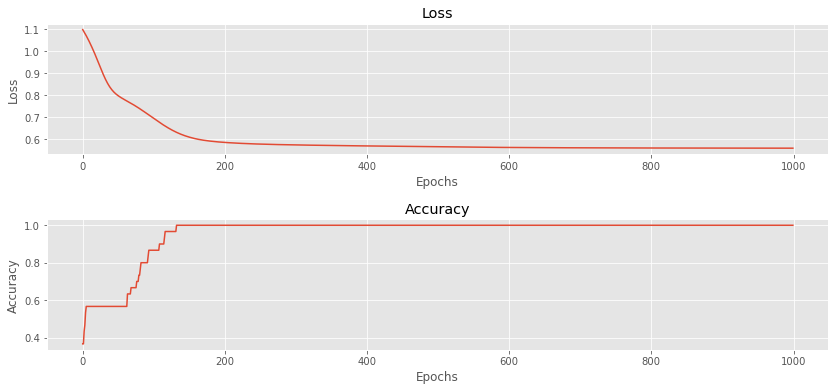

In [9]:
from matplotlib import style
style.use("ggplot")
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(accuracy_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.subplots_adjust(hspace=0.5)
plt.show()

# Batch Normalization

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import livelossplot
from livelossplot import PlotLossesKerasTF

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
iris=load_iris()

x=iris.data
y=iris.target
y=pd.get_dummies(y)
#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [12]:
model=Sequential()
model.add(Dense(20,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(20,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(20,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(3,activation="softmax"))

In [13]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

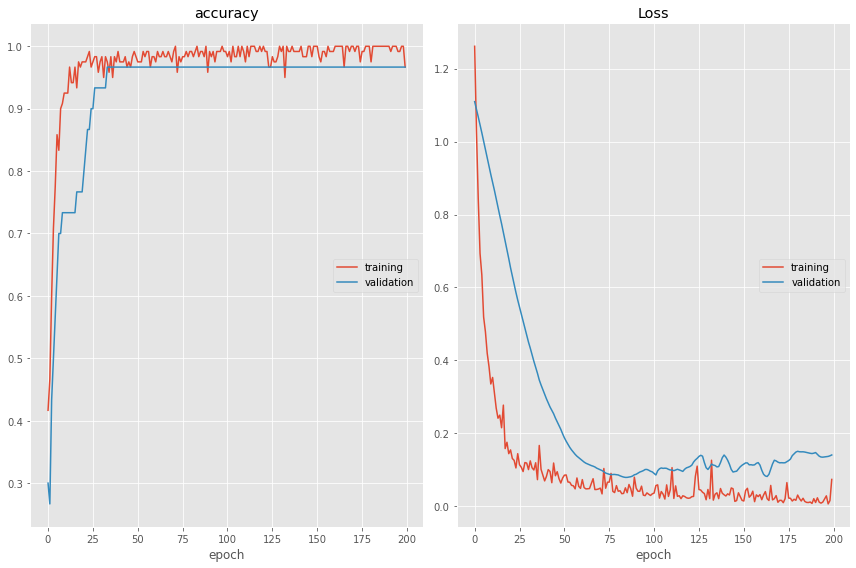

accuracy
	training         	 (min:    0.417, max:    1.000, cur:    0.967)
	validation       	 (min:    0.267, max:    0.967, cur:    0.967)
Loss
	training         	 (min:    0.006, max:    1.261, cur:    0.074)
	validation       	 (min:    0.079, max:    1.109, cur:    0.141)
4/4 [==============================] - 0s 116ms/step - loss: 0.0736 - accuracy: 0.9667 - val_loss: 0.1407 - val_accuracy: 0.9667


In [14]:
model.fit(x_train_std,y_train,epochs=200,callbacks=[PlotLossesKerasTF()],
          validation_data=(x_test_std,y_test))